# Sea Level Predictor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

## Use Pandas to import the data from epa-sea-level.csv

In [2]:
df = pd.read_csv('epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


## Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis

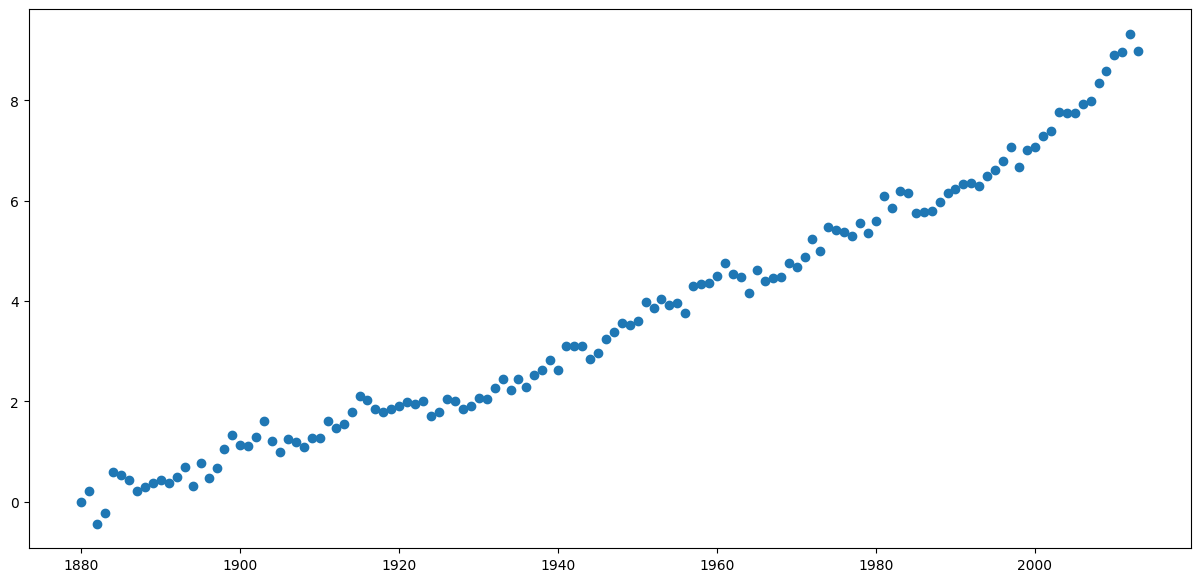

In [3]:
plt.figure(figsize=(15, 7))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

## Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit

In [4]:
slope, intercept, _, _, _ = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")

Slope: 0.06
Intercept: -119.07


## Plot the line of best fit over the top of the scatter plot - make the line go through the year 2050 to predict the sea level rise in 2050

### Create x values for line of best fit

In [5]:
years = range(df['Year'].min(), 2051)
years

range(1880, 2051)

### Calc y values for line of best fit

In [6]:
y = [slope * year + intercept for year in years]
y[0:10]

[np.float64(-0.5421240249263661),
 np.float64(-0.4790794409142336),
 np.float64(-0.41603485690208686),
 np.float64(-0.3529902728899543),
 np.float64(-0.2899456888778218),
 np.float64(-0.22690110486568926),
 np.float64(-0.16385652085355673),
 np.float64(-0.1008119368414242),
 np.float64(-0.037767352829277456),
 np.float64(0.025277231182855076)]

In [7]:
y[-11:-1]

[np.float64(9.545009417015194),
 np.float64(9.608054001027341),
 np.float64(9.671098585039488),
 np.float64(9.734143169051606),
 np.float64(9.797187753063753),
 np.float64(9.860232337075871),
 np.float64(9.923276921088018),
 np.float64(9.986321505100136),
 np.float64(10.049366089112283),
 np.float64(10.11241067312443)]

### Plot line of best fit on scatter plot

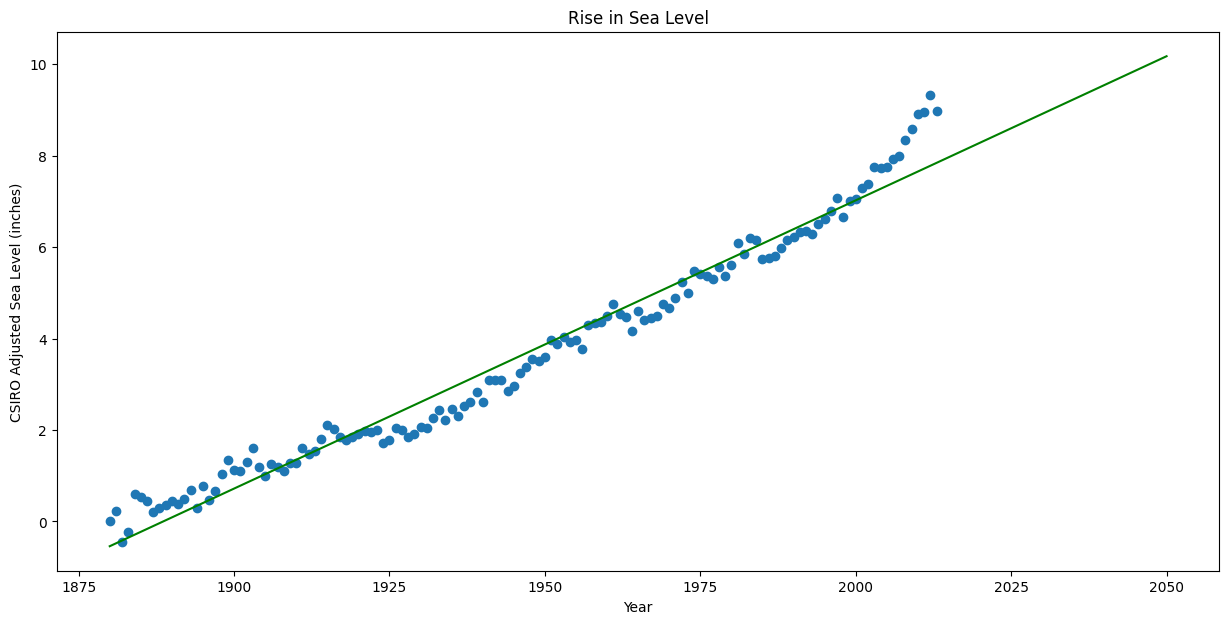

In [8]:
# Scatter plot
plt.figure(figsize=(15, 7))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

# Line of best fit
plt.plot(years, y, 'g')

# Labels
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.show()

## Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset - make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

### Filter data to include only years >= 2000

In [9]:
df_filt = df[df['Year'] >= 2000]
df_filt

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354


### Calculate slope and y intercept of line of best fit for filtered data

In [10]:
slope_filtered, intercept_filtered, _, _, _= linregress(df_filt['Year'], df_filt['CSIRO Adjusted Sea Level'])
print(f"Slope filtered: {slope_filtered:.2f}")
print(f"Intercept filtered: {intercept_filtered:.2f}")

Slope filtered: 0.17
Intercept filtered: -325.79


### Plot line of best fit on scatter plot

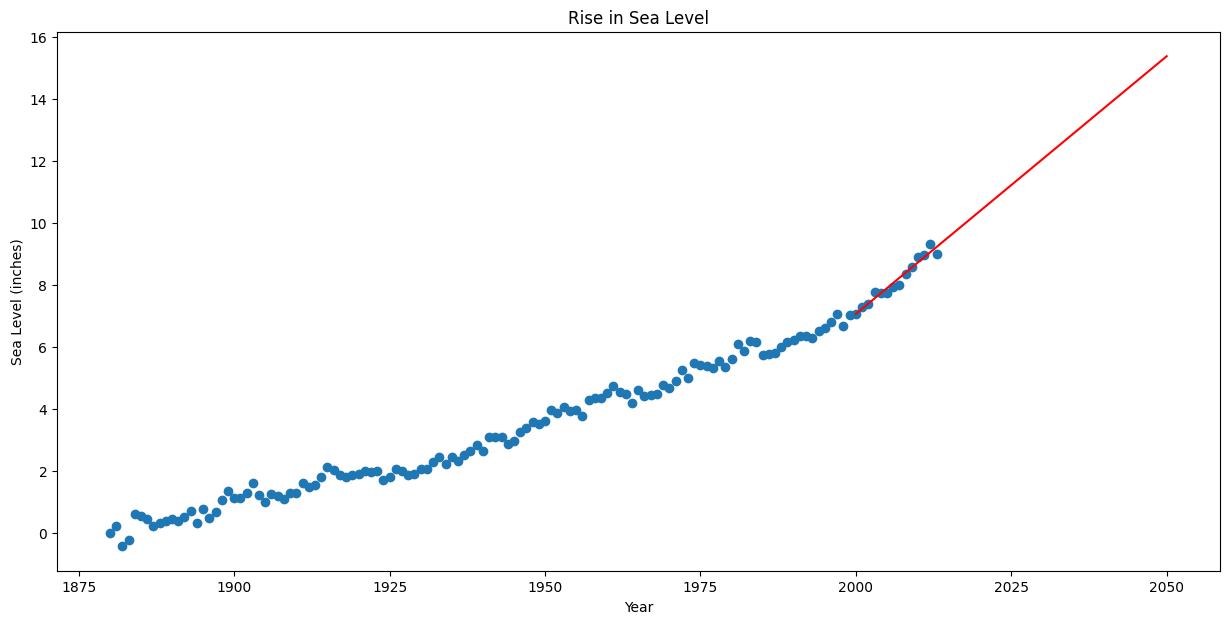

In [11]:
# Create scatter plot
plt.figure(figsize=(15, 7))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

# Plot line of best fit for the filtered data
x_filt = range(df_filt['Year'].min(), 2051)
y_filt = slope_filtered * x_filt + intercept_filtered
plt.plot(x_filt, y_filt, 'r')

# Labels
plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')

# Show plot
plt.show()